<a href="https://colab.research.google.com/github/Pavadareni/AI_Training/blob/main/Text_Classification/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project involves in text classification. The model used is twitter-roberta-base-sentiment-latest. This model is used in twitter algorithm. It classifies positive negative and neutral. It also classifies the emojies and other special character.

In [2]:
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import re


In [3]:
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [4]:
# Lists to store user inputs, predicted labels, and confidences
texts = []
predicted_labels = []
confidences = []

# Map for label adjustment
label_map = {"negative": 0, "neutral": 1, "positive": 2}

In [5]:
# Text preprocessing function with additional steps
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

In [6]:
def adjust_label(prediction):
    confidence = prediction['score']
    if confidence > 0.7:
        return "positive"
    elif 0.4 < confidence <= 0.7:
        return "neutral"
    else:
        return "negative"


In [7]:
print("Enter text to analyze sentiment (type 'exit' to finish):")


Enter text to analyze sentiment (type 'exit' to finish):


In [8]:
while True:
    user_input = input("Text: ")
    if user_input.lower() == "exit":
        break

    # Preprocess text
    processed_text = preprocess_text(user_input)
    texts.append(processed_text)

    # Predict and adjust sentiment
    prediction = sentiment_pipeline(processed_text)[0]
    adjusted_label = adjust_label(prediction)
    predicted_label = label_map.get(adjusted_label, 1)  # Default to "neutral"
    confidence = prediction['score']
    confidences.append(confidence)
    predicted_labels.append(predicted_label)

    print(f"Predicted Sentiment: {adjusted_label.capitalize()} (Confidence: {confidence:.2f})")


Text: its impossible
Predicted Sentiment: Neutral (Confidence: 0.67)
Text: i never do that work
Predicted Sentiment: Positive (Confidence: 0.77)
Text: this is incorrect
Predicted Sentiment: Neutral (Confidence: 0.65)
Text: this is not true
Predicted Sentiment: Neutral (Confidence: 0.48)
Text: you are bad 
Predicted Sentiment: Positive (Confidence: 0.87)
Text: negative 
Predicted Sentiment: Neutral (Confidence: 0.49)
Text: null
Predicted Sentiment: Neutral (Confidence: 0.60)
Text: exit


In [9]:
avg_confidence = np.mean(confidences)
print(f"\nAverage Model Confidence: {avg_confidence:.2f}")



Average Model Confidence: 0.65


In [10]:
sentiment_count = {
    "Positive": predicted_labels.count(2),
    "Neutral": predicted_labels.count(1),
    "Negative": predicted_labels.count(0)
}


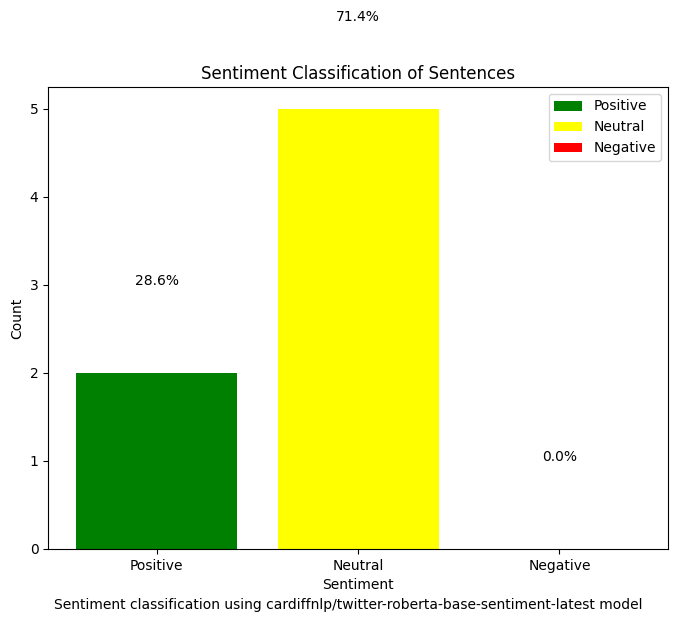

In [17]:
colors = {'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'}
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_count.keys(), sentiment_count.values(), color=[colors[sent] for sent in sentiment_count.keys()])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Classification of Sentences')

total = sum(sentiment_count.values())
for bar, sentiment in zip(bars, sentiment_count.keys()):
    yval = bar.get_height()
    percentage = (yval / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{percentage:.1f}%", ha='center', fontsize=10)
plt.legend(bars, sentiment_count.keys(), loc='upper right')
plt.figtext(0.5, 0.01, "Sentiment classification using cardiffnlp/twitter-roberta-base-sentiment-latest model", ha="center", fontsize=10)
plt.show()
